In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Rice_Image_Dataset.zip', 'r')
zip_ref.extractall('/content/dataset')  # Extract to a folder
zip_ref.close()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

base_path = r"dataset/Rice_Image_Dataset"

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    validation_split=0.2,  
    rotation_range=25,  
    width_shift_range=0.2, 
    height_shift_range=0.2,  
    horizontal_flip=True,  
    zoom_range=0.2 
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  
    color_mode='rgb',  
    batch_size=32,  
    class_mode='categorical',  
    subset='training',  
    shuffle=True,  
    seed=1  
)

validation_generator = validation_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  
    color_mode='rgb',  
    batch_size=32,  
    class_mode='categorical', 
    subset='validation',  
    shuffle=False,  
    seed=1  
)

print("Class indices:", train_generator.class_indices)

num_classes = len(train_generator.class_indices)

base_model = ResNet50(
    weights='imagenet', 
    include_top=False,  
    input_shape=(224, 224, 3)  
)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(1024, activation='relu')(x)  
x = Dropout(0.4)(x) 
outputs = Dense(num_classes, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)

model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  
)

model.save("rice_grain_resnet50.h5")
print("Model saved successfully!")

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,691,013 (98.00 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 807s 422ms/step - accuracy: 0.9203 - loss: 0.2199 - val_accuracy: 0.9832 - val_loss: 0.0527
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 800s 427ms/step - accuracy: 0.9783 - loss: 0.0647 - val_accuracy: 0.9873 - val_loss: 0.0373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 792s 422ms/step - accuracy: 0.9810 - loss: 0.0554 - val_accuracy: 0.9819 - val_loss: 0.0504
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 804s 422ms/step - accuracy: 0.9830 - loss: 0.0502 - val_accuracy: 0.9859 - val_loss: 0.0429
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 800s 427ms/step - accuracy: 0.9861 - loss: 0.0407 - val_accuracy: 0.9884 - val_loss: 0.0318
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 786s 419ms/step - accuracy: 0.9855 - loss: 0.0420 - val_accuracy: 0.9902 - val_loss: 0.0266
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 837s 438ms/step - accuracy: 0.9870 - loss: 0.0380 - val_accuracy: 0.9870 - val_loss: 0.0398
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 868s 441ms/step - ac

Model saved successfully!


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import glob

root_path = 'dataset/Rice_Image_Dataset'

class_names = [d for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]
print("Class Names:", class_names)

filepaths = list(glob.glob(os.path.join(root_path, '*', '*.*')))
labels = [os.path.split(os.path.split(fp)[0])[1] for fp in filepaths]

data = pd.DataFrame({'Filepath': filepaths, 'Label': labels})

train, test = train_test_split(data, test_size=0.25, random_state=42, stratify=data['Label'])

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),  
    color_mode='rgb',  
    class_mode='categorical',  
    batch_size=32,  
    shuffle=False 
)


Class Names: ['Basmati', 'Ipsala', 'Jasmine', 'Arborio', 'Karacadag']
Found 18750 validated image filenames belonging to 5 classes.


In [ ]:
print("Test Generator:")
print(f"Number of images: {test_generator.samples}")
print(f"Class indices: {test_generator.class_indices}")

Test Generator:
Number of images: 18750
Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


586/586 ━━━━━━━━━━━━━━━━━━━━ 56s 95ms/step - accuracy: 0.9904 - loss: 0.0278
Test Loss: 0.0261
Test Accuracy: 0.9910


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

586/586 ━━━━━━━━━━━━━━━━━━━━ 61s 95ms/step
Confusion Matrix:
[[3738    0    0    5    7]
 [   0 3716    0   34    0]
 [   0    0 3750    0    0]
 [  22   18    4 3706    0]
 [  78    0    0    0 3672]]
Classification Report:
              precision    recall  f1-score   support

     Arborio       0.97      1.00      0.99      3750
     Basmati       1.00      0.99      0.99      3750
      Ipsala       1.00      1.00      1.00      3750
     Jasmine       0.99      0.99      0.99      3750
   Karacadag       1.00      0.98      0.99      3750

    accuracy                           0.99     18750
   macro avg       0.99      0.99      0.99     18750
weighted avg       0.99      0.99      0.99     18750



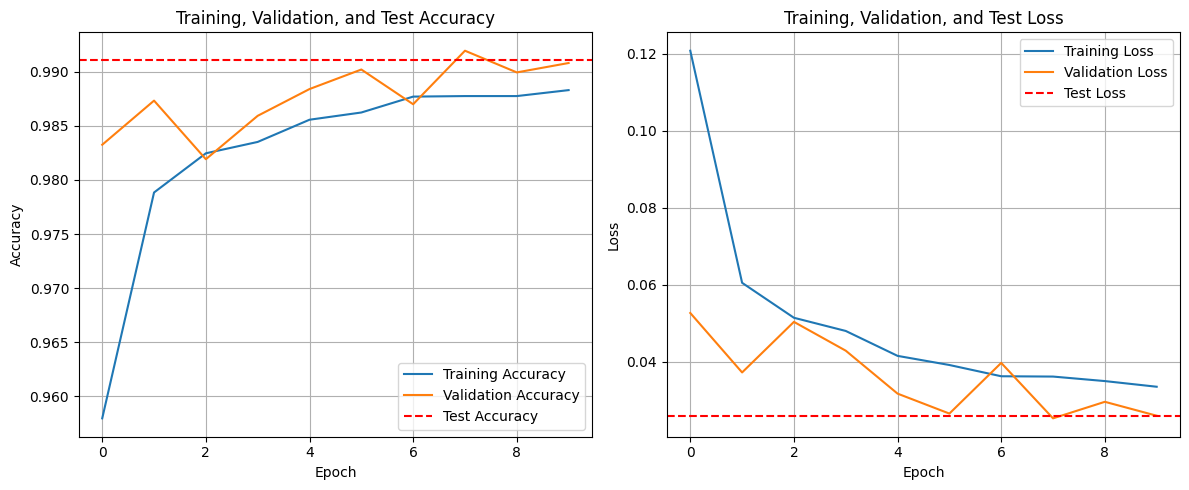

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')  # Add test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Add test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()